# Experiemento Rafael


# TAREFAS:
 - Organizar Angulos por trial e por voluntário?
 - Usar mesmo padrão do rafaelDBConcat mas organizar numa pasta com arquivo para cada trial
 - Arrumar código com novo CSV

 (Até Segunda -> 07/07/25)

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.nonparametric.smoothers_lowess import lowess

In [70]:
## leitura e Tratamento dos dados
df_original = pd.read_csv("../../data/rafaelDBConcat.csv")

In [71]:
## carrega os dados
df = df_original.copy()

In [72]:
## pre-processamento 1

In [73]:
df = df.fillna(df.median)

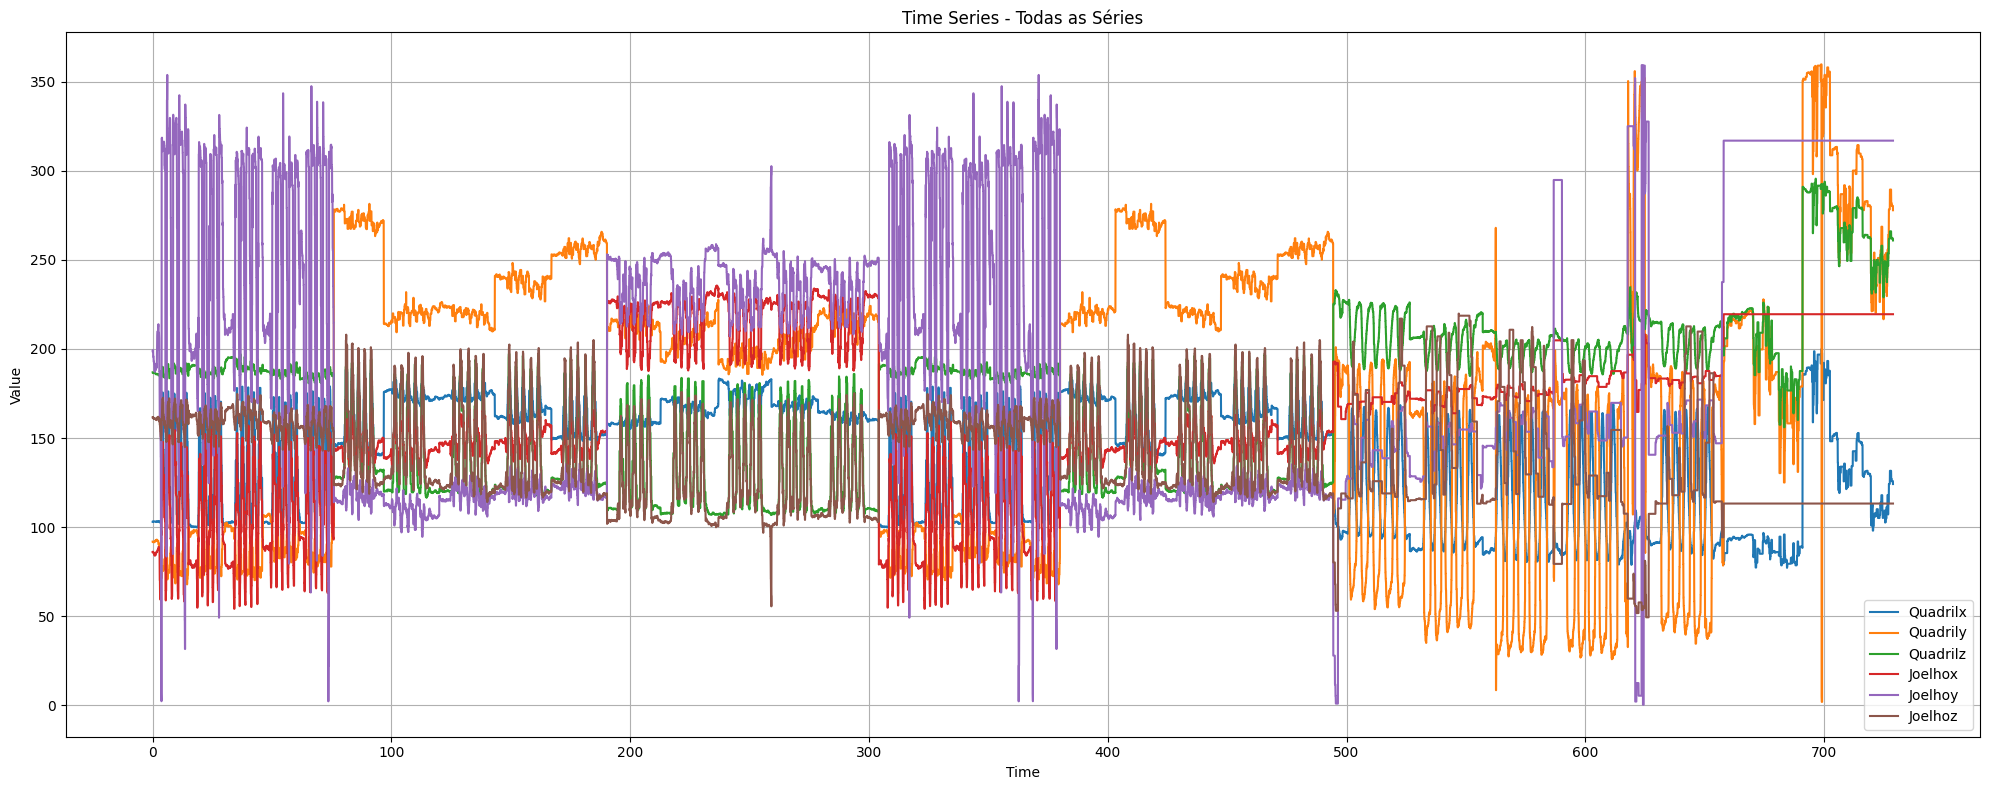

In [74]:
## visualização das 
plt.figure(figsize=(20, 8))

for col in df.columns[1:]:
    plt.plot(df.iloc[:,0], df[col], label=col)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Todas as Séries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

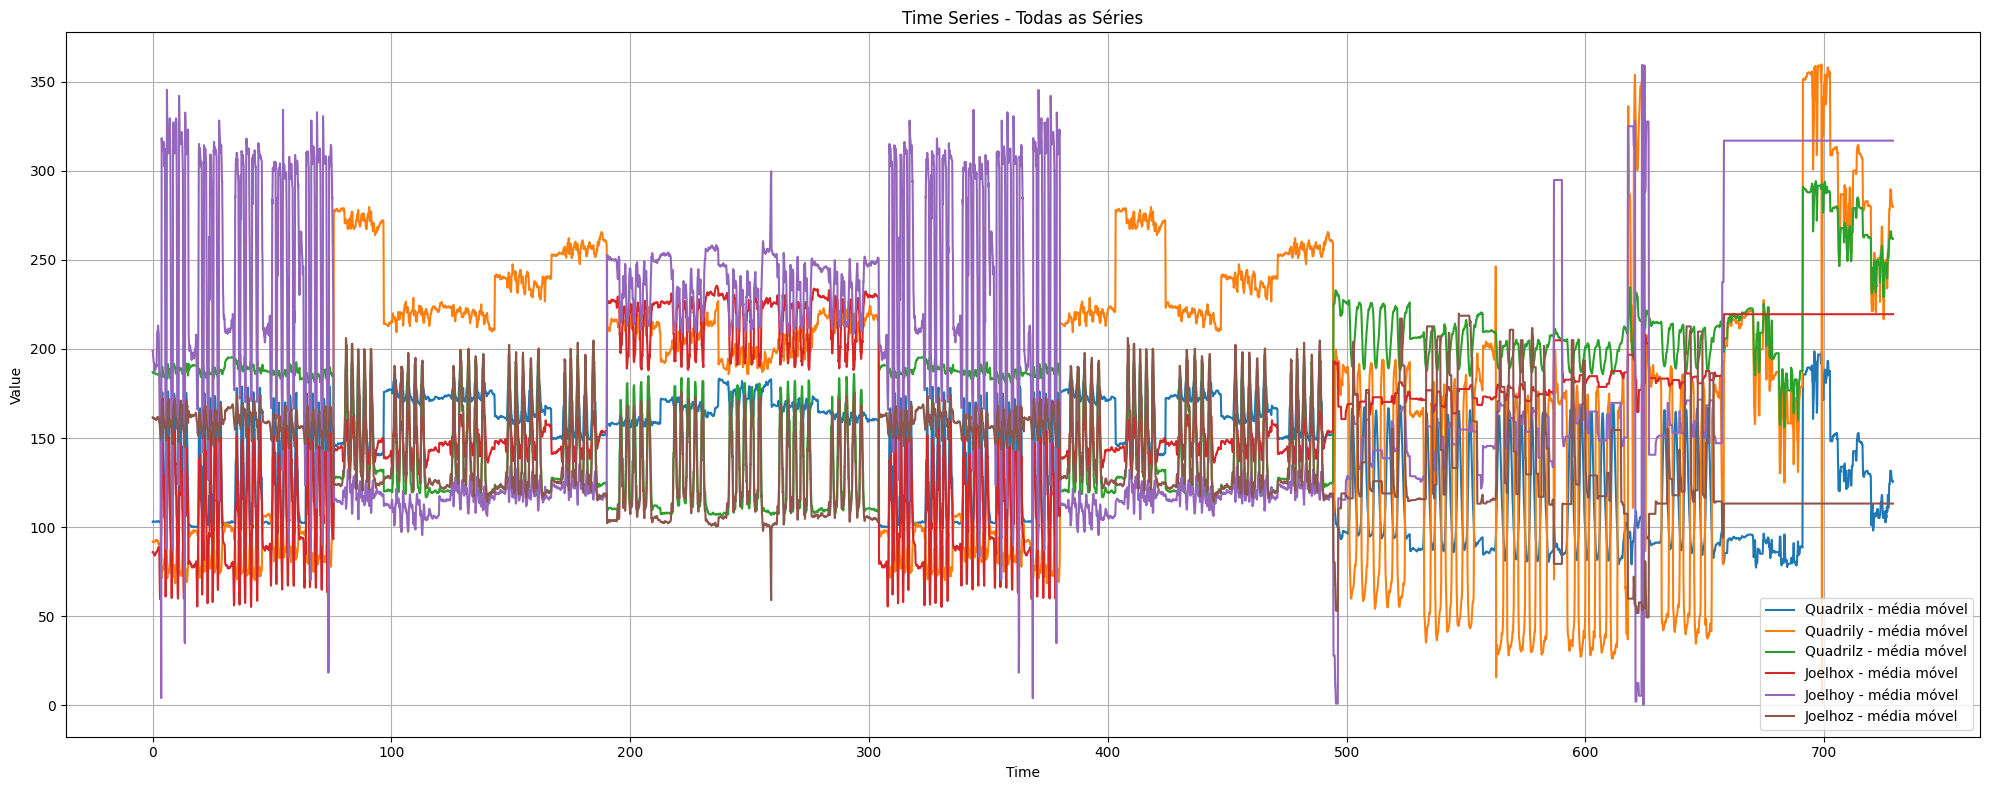

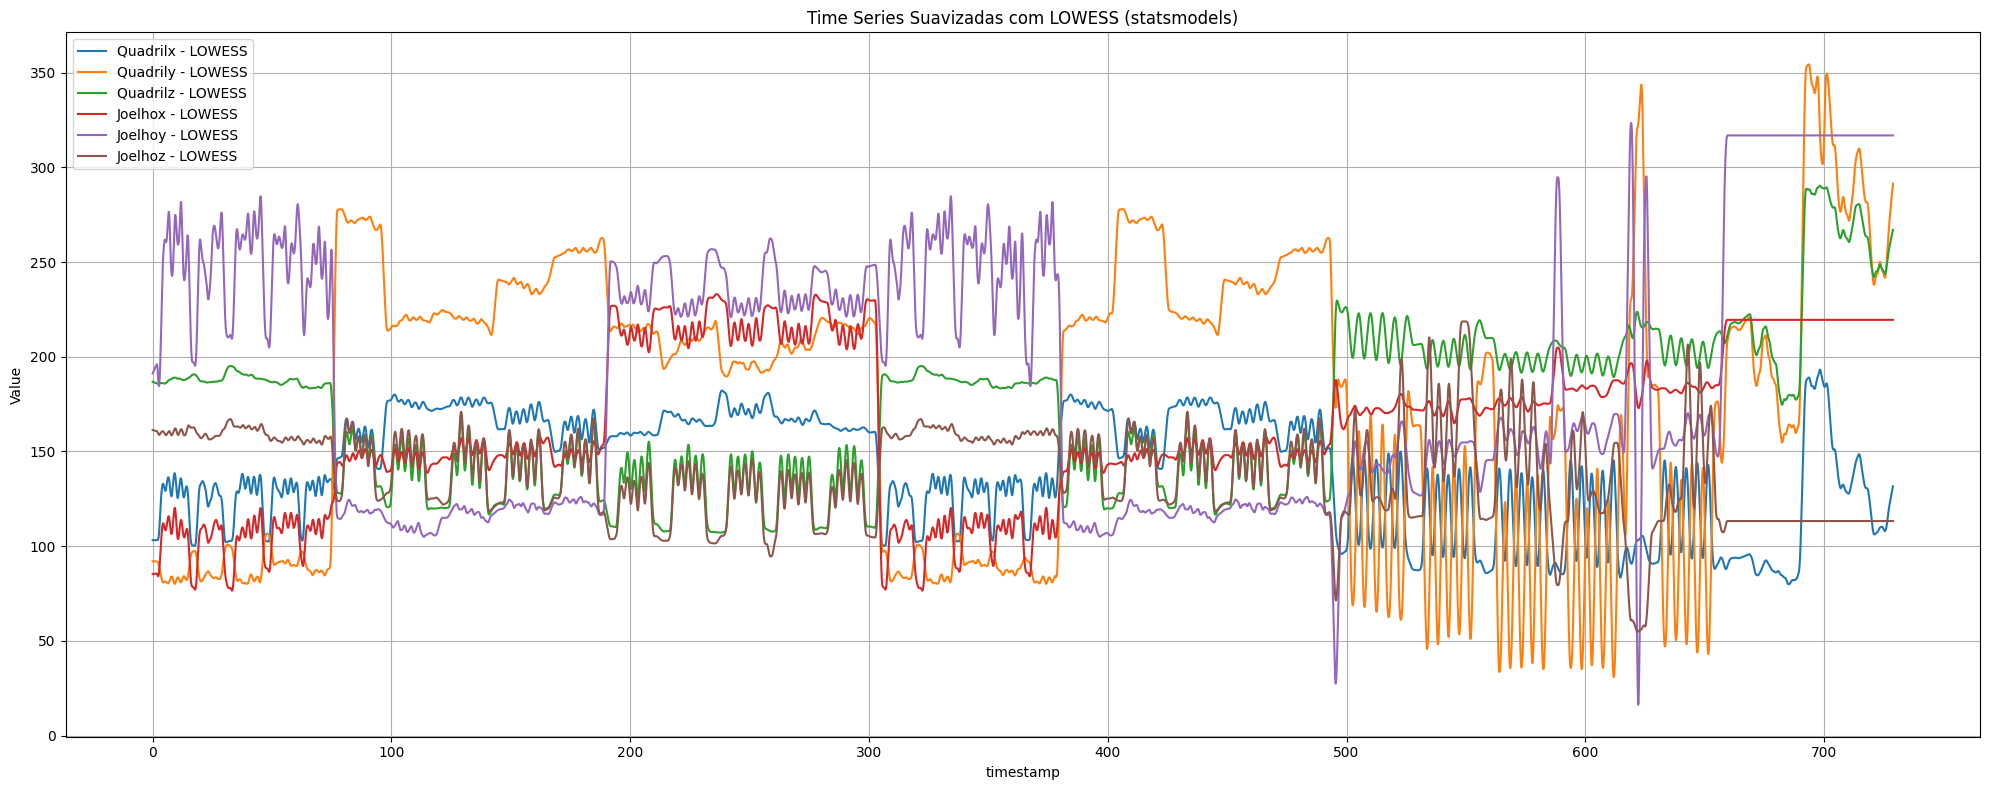

In [92]:
"""
suavização de cada série com média móvel
suavização de cada série com Locally Estimated Scatterplot Smoothing - LOESS (https://pypi.org/project/loess/)
"""

### média móvel

df_mediaMovel =  df.copy()

x = df_mediaMovel.iloc[:, 0]

# aplicar média móvel em todas as séries
for col in df_mediaMovel.columns[1:]:
    df_mediaMovel[col] = df_mediaMovel[col].rolling(window=5, center=True).mean()

plt.figure(figsize=(20, 8))
for col in df_mediaMovel.columns[1:]:
    plt.plot(x, df_mediaMovel[col], label=f'{col} - média móvel')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series - Todas as Séries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Loess

df_loess = df.copy()

# converte x para numérico (necessário para o LOWESS)
x = pd.to_numeric(df_loess.iloc[:, 0])

plt.figure(figsize=(20, 8))

# aplica LOWESS em todas as séries (1 → fim)
for col in df_loess.columns[1:]:
    y = df_loess[col].values
    
    # lowess devolve um array 2D: [ [x0, y0], [x1, y1], ... ]
    smoothed = lowess(y, x, frac=0.005, it=0)
    
    # plota os dados suavizados
    plt.plot(df_loess.iloc[:, 0], smoothed[:, 1], label=f'{col} - LOWESS')

plt.xlabel(df_loess.columns[0])
plt.ylabel('Value')
plt.title('Time Series Suavizadas com LOWESS (statsmodels)')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [79]:
"""
calcular uma matriz de distância entre as séries. Distâncias:
    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) 
        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)
    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)
    - escolhe um corte e visualiza os clusters
"""

'\ncalcular uma matriz de distância entre as séries. Distâncias:\n    - a distância vai ser: soma das distancias euclidiana das univariadas (dist joelho x + joelho y + joelho z + quadril x + quadril y + quadril z) \n        (entre duas trials, igualzinho o que vc já fez antes, só qeu agora considerando todas as variáveis (série temporal **multivariada**)\n    - usa clusterização hierárquica aglomerativa (sklearn.cluster.AgglomerativeClustering)\n    - escolhe um corte e visualiza os clusters\n'

In [80]:
# Clusterização k-means DTW
"""
- para n_clusters em [2, 10]:
    - clusteriza com o DTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o DTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [81]:
# Clusterização k-means CTW
"""
- para n_clusters em [2, 10]:
    - clusteriza com o CTW
    - calcula métricas (silhouette score, inertia)
- analiza regra do cotovelo e escolhe um número de clusters
- visualiza clusters
"""

'\n- para n_clusters em [2, 10]:\n    - clusteriza com o CTW\n    - calcula métricas (silhouette score, inertia)\n- analiza regra do cotovelo e escolhe um número de clusters\n- visualiza clusters\n'

In [82]:
# Análise dos resultados
"""
Compara o que vc obteve com 3 métodos acima.
"""

"""
Hipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?
Pra responder:
- experimento comparando métodos de clusterização para encontrar o melhor deles.
- **analisar se a clusterização foi de fato útil ou não**.
"""

'\nHipótese: Clusterizar séries temporais é útil para detectar padrões de compensação de movimento nos dados do BSN?\nPra responder:\n- experimento comparando métodos de clusterização para encontrar o melhor deles.\n- **analisar se a clusterização foi de fato útil ou não**.\n'

In [83]:
# Conclusão